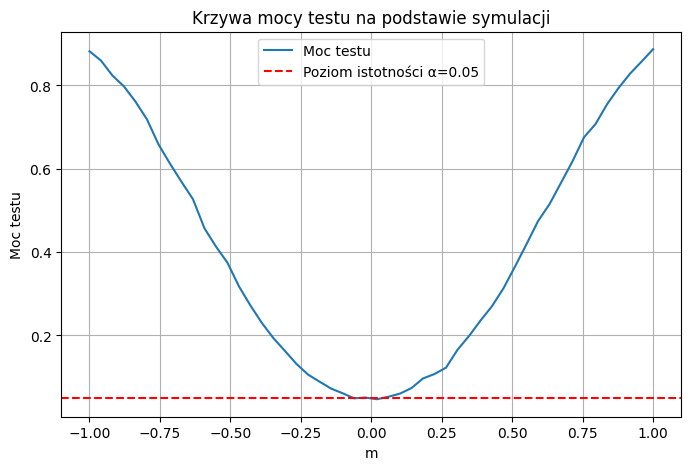

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parametry symulacji
alpha = 0.05  # Poziom istotności
n = 10  # Liczność próby
m0 = 0  # Średnia w H0
sigma = 1  # Odchylenie standardowe
k = 10000  # Liczba symulacji

m_values = np.linspace(-1, 1, 50)
powers = []

np.random.seed(42)

for m in m_values:
    # Losowanie próbek
    samples = np.random.normal(m, sigma, (k, n))
    
    # Obliczanie statystyki testowej i p-value
    sample_means = np.mean(samples, axis=1)
    se = sigma / np.sqrt(n)
    t_stats = (sample_means - m0) / se
    p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stats)))  # Test dwustronny

    # Obliczanie mocy testu
    power = np.mean(p_values < alpha)
    powers.append(power)

# Wykres krzywej mocy testu
plt.figure(figsize=(8, 5))
plt.plot(m_values, powers, label="Moc testu")
plt.axhline(y=0.05, color='r', linestyle='--', label=f'Poziom istotności α={alpha}')
plt.xlabel("m")
plt.ylabel("Moc testu")
plt.title("Krzywa mocy testu")
plt.legend()
plt.grid()
plt.show()


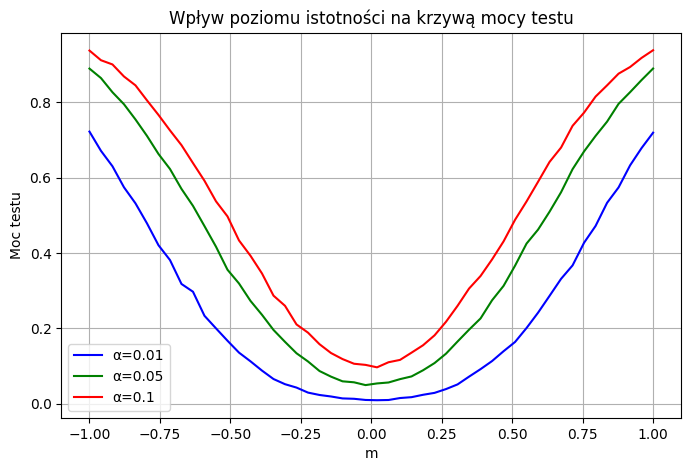

In [ ]:
# Parametry symulacji
n = 10  
m0 = 0  
sigma = 1  
k = 10000  

# Różne poziomy istotności do analizy
alpha_values = [0.01, 0.05, 0.1]
colors = ['b', 'g', 'r']

m_values = np.linspace(-1, 1, 50)

plt.figure(figsize=(8, 5))

# Przeprowadzenie symulacji dla różnych wartości alfa
for alpha, color in zip(alpha_values, colors):
    powers = []
    
    for m in m_values:
        samples = np.random.normal(m, sigma, (k, n))
        
        sample_means = np.mean(samples, axis=1)
        se = sigma / np.sqrt(n)
        t_stats = (sample_means - m0) / se
        p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stats))) 

        power = np.mean(p_values < alpha)
        powers.append(power)

    plt.plot(m_values, powers, label=f'α={alpha}', color=color)

# Wykres
plt.xlabel("m")
plt.ylabel("Moc testu")
plt.title("Wpływ poziomu istotności na krzywą mocy testu")
plt.legend()
plt.grid()
plt.show()


# Interpretacja wyników:

# Niższy poziom istotności (0,01) – test jest bardziej konserwatywny, co oznacza, że rzadziej odrzuca hipotezę zerową. 
# Skutkuje to niższą mocą testu, szczególnie dla mniejszych odchyleń od H0.

# Standardowy poziom istotności (0,05) – kompromis między kontrolą błędów I rodzaju (fałszywie odrzucone H0) a mocą testu.

# Wyższy poziom istostności (0,1) - test częściej odrzuca H0, co zwiększa jego moc, ale też zwiększa ryzyko popełnienia błędu I rodzaju.

# Wniosek: Wyższy poziom istotności prowadzi do większej mocy testu, ponieważ łatwiej odrzucić H0.
# Jednak kosztem tego jest większe ryzyko fałszywych alarmów (błędów I rodzaju). 
# Wybór odpowiedniego alfa zależy od kontekstu analizy i konsekwencji błędów w danym przypadku.


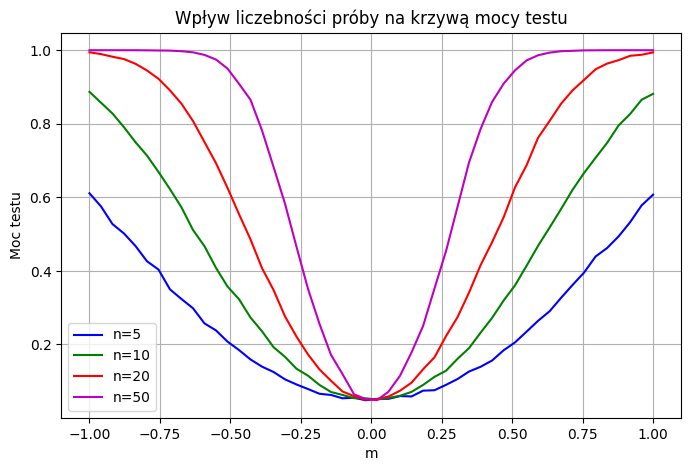

In [ ]:
# Parametry symulacji
m0 = 0  
sigma = 1  
k = 10000  
alpha = 0.05  

# Różne wielkości próby do analizy
n_values = [5, 10, 20, 50]
colors = ['b', 'g', 'r', 'm']

m_values = np.linspace(-1, 1, 50)

plt.figure(figsize=(8, 5))

# Przeprowadzenie symulacji dla różnych wartości n
for n, color in zip(n_values, colors):
    powers = []
    
    for m in m_values:
        samples = np.random.normal(m, sigma, (k, n))
        
        sample_means = np.mean(samples, axis=1)
        se = sigma / np.sqrt(n)
        t_stats = (sample_means - m0) / se
        p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stats)))  

        power = np.mean(p_values < alpha)
        powers.append(power)

    plt.plot(m_values, powers, label=f'n={n}', color=color)

# Wykres
plt.xlabel("m")
plt.ylabel("Moc testu")
plt.title("Wpływ liczebności próby na krzywą mocy testu")
plt.legend()
plt.grid()
plt.show()


# Interpretacja wyników:

# Małe próby (n=5) – moc testu jest niska, zwłaszcza dla wartości średniej bliskich hipotezie zerowej. 
# Test ma trudność w wykrywaniu rzeczywistego efektu.

# Średnie próby (n=10,20) – moc testu stopniowo rośnie, co oznacza, że test skuteczniej wykrywa odchylenia od H0.

# Duże próby (n=50) – krzywa staje się bardziej stroma, a test z dużą pewnością wykrywa nawet niewielkie różnice
# między H0, a rzeczywistą średnią.

# Wniosek: Wzrost liczebności próby znacząco poprawia moc testu, co oznacza, że test ma większą zdolność do wykrycia 
# rzeczywistego efektu. Większe próby zmniejszają wariancję oszacowania średniej, co prowadzi do bardziej precyzyjnych wyników.


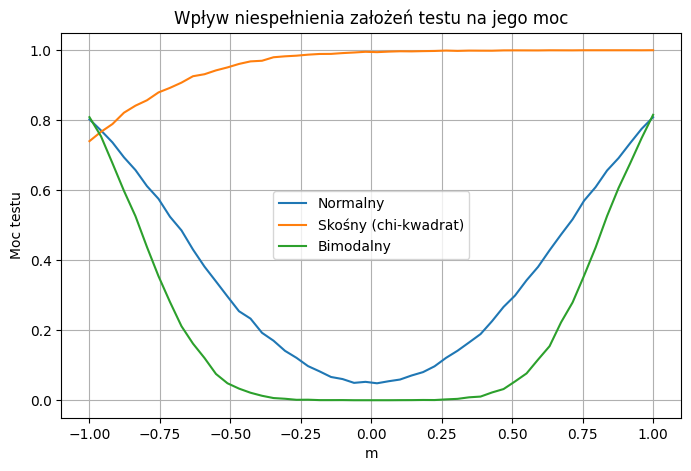

In [ ]:
# Funkcje do generowania różnych rozkładów
def skewed_distribution(size):
    """Generuje rozkład skośny (chi-kwadrat z 3 stopniami swobody)"""
    return np.random.chisquare(df=3, size=size)

def bimodal_distribution(size):
    """Generuje rozkład bimodalny (suma dwóch rozkładów normalnych)"""
    half_size = size // 2
    return np.concatenate([
        np.random.normal(-1, 0.5, half_size),
        np.random.normal(1, 0.5, size - half_size)
    ])

# Lista rozkładów do analizy
distributions = {
    "Normalny": lambda size: np.random.normal(0, 1, size),
    "Skośny (chi-kwadrat)": skewed_distribution,
    "Bimodalny": bimodal_distribution
}

# Parametry testu
n = 10  
alpha = 0.05
m_values = np.linspace(-1, 1, 50)
k = 10000  

plt.figure(figsize=(8, 5))

# Analiza mocy testu dla różnych rozkładów
for dist_name, dist_func in distributions.items():
    powers = []
    
    for m in m_values:
        samples = np.array([dist_func(n) + m for _ in range(k)])  
      
        sample_means = np.mean(samples, axis=1)
        se = np.std(samples, axis=1, ddof=1) / np.sqrt(n)  
        t_stats = (sample_means - 0) / se
        p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n-1)) 

        power = np.mean(p_values < alpha)
        powers.append(power)

    plt.plot(m_values, powers, label=dist_name)

# Wykres
plt.xlabel("m")
plt.ylabel("Moc testu")
plt.title("Wpływ niespełnienia założeń testu na jego moc")
plt.legend()
plt.grid()
plt.show()


# Interpretacja wyników:

# Rozkład normalny – test jest dobrze skalibrowany, a moc rośnie systematycznie wraz z oddalaniem się od m=0.

# Rozkład skośny (chi-kwadrat) – test ma niższą moc dla wartości bliskich zeru, co oznacza, że trudniej wykryć 
# efekt, gdy dane nie są normalnie rozłożone.

# Rozkład bimodalny – test może mieć trudności w przypadku wartości bliskich zeru, ponieważ dane pochodzą z 
# dwóch różnych centrów, co może zaburzać wyniki testu t-Studenta.

# Wnioski:
# Niespełnienie założenia normalności wpływa na moc testu, zwłaszcza w przypadku skośnych i wielomodalnych rozkładów.
# Rozkłady skośne mogą obniżać moc testu, szczególnie dla małych efektów.
# W przypadku rozkładów nietypowych warto rozważyć alternatywne testy, np. testy nieparametryczne (Manna-Whitneya, Wilcoxona). 


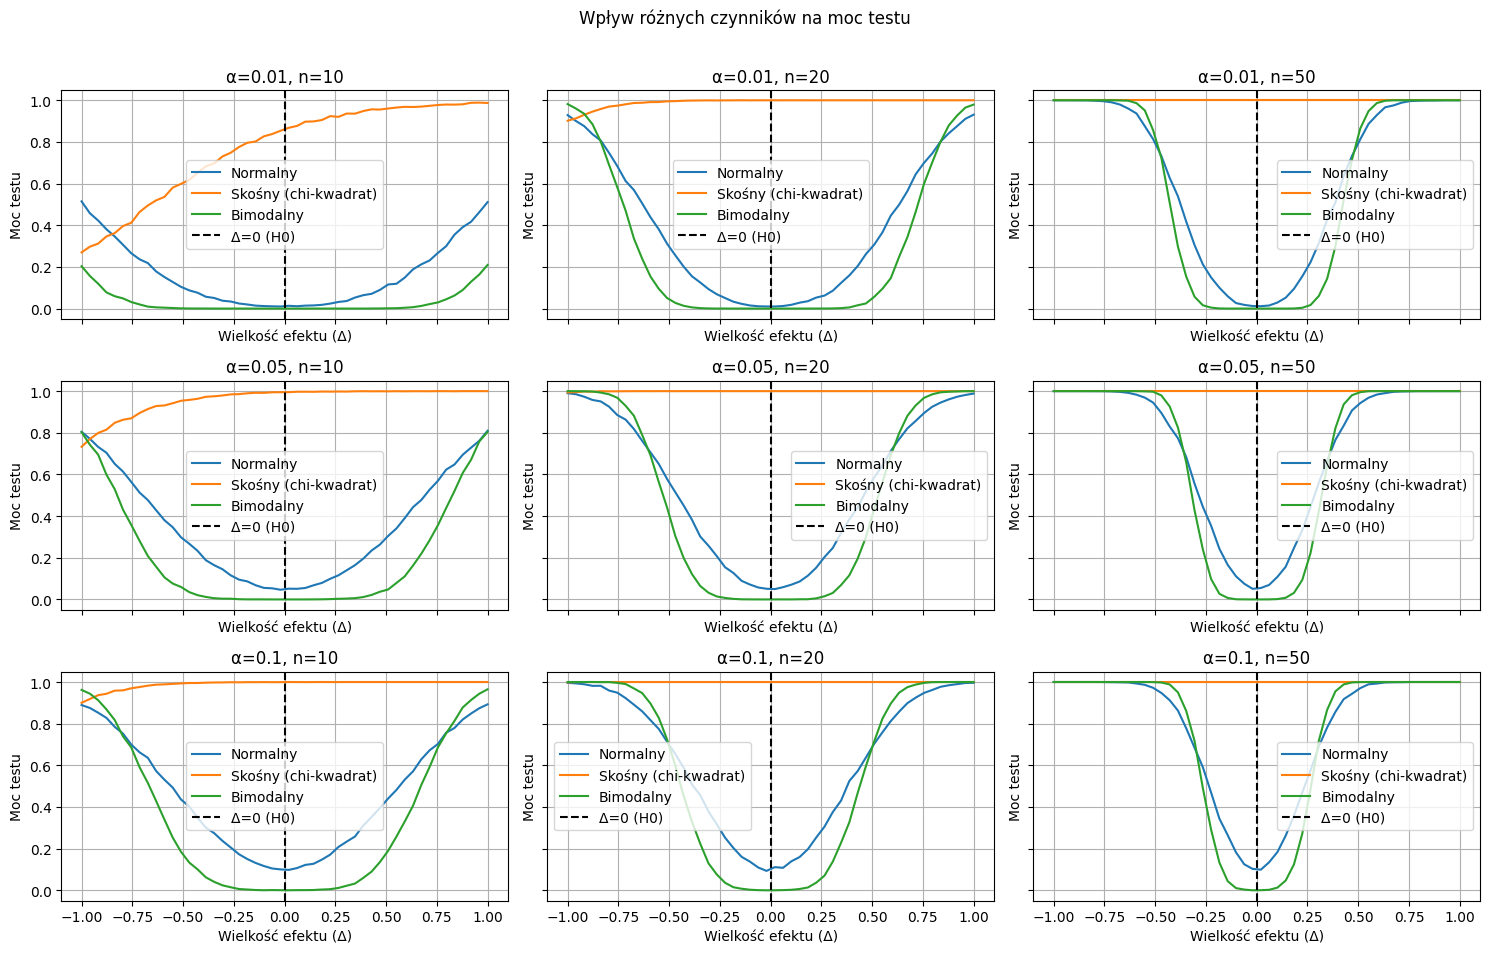

In [ ]:
# Funkcje do generowania różnych rozkładów
def skewed_distribution(size):
    # Generuje rozkład skośny (chi-kwadrat z 3 stopniami swobody)
    return np.random.chisquare(df=3, size=size)

def bimodal_distribution(size):
    # Generuje rozkład bimodalny
    half_size = size // 2
    return np.concatenate([
        np.random.normal(-1, 0.5, half_size),
        np.random.normal(1, 0.5, size - half_size)
    ])

# Parametry symulacji
alpha_values = [0.01, 0.05, 0.1] 
n_values = [10, 20, 50]  
distributions = {
    "Normalny": lambda size: np.random.normal(0, 1, size),
    "Skośny (chi-kwadrat)": skewed_distribution,
    "Bimodalny": bimodal_distribution
}

# Zakres wartości efektu
delta_values = np.linspace(-1, 1, 50)
k= 5000 

# Tworzenie wykresów dla różnych poziomów istotności, liczności próby i rozkładów
fig, axes = plt.subplots(len(alpha_values), len(n_values), figsize=(15, 10), sharex=True, sharey=True)

for i, alpha in enumerate(alpha_values):
    for j, n in enumerate(n_values):
        ax = axes[i, j]
        
        # Analiza mocy testu dla różnych rozkładów
        for dist_name, dist_func in distributions.items():
            powers = []
            
            for delta in delta_values:
                samples = np.array([dist_func(n) + delta for _ in range(k)])

                sample_means = np.mean(samples, axis=1)
                se = np.std(samples, axis=1, ddof=1) / np.sqrt(n)
                t_stats = (sample_means - 0) / se
                p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n-1))

                power = np.mean(p_values < alpha)
                powers.append(power)

            ax.plot(delta_values, powers, label=dist_name)

        # Oznaczenia wykresu
        ax.set_title(f"α={alpha}, n={n}")
        ax.axvline(x=0, color='k', linestyle='--', label='Δ=0 (H0)')
        ax.set_xlabel("Wielkość efektu (Δ)")
        ax.set_ylabel("Moc testu")
        ax.legend()
        ax.grid()

# Dostosowanie wyglądu
plt.suptitle("Wpływ różnych czynników na moc testu")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


# Interpretacja wyników:
# Wpływ poziomu istotności: wyższa wartość alfa zwiększa moc testu, ale również ryzyko błędu I rodzaju.
# Wpływ liczebności próby: większa liczność zwiększa moc testu i poprawia wykrywanie efektów.
# Wpływ rodzaju rozkładu populacji:
   # Normalny rozkład daje najlepsze rezultaty.
   # Skośny rozkład zmniejsza moc testu dla małych efektów.
   # Bimodalny rozkład utrudnia wykrywanie efektów bliskich zeru.

# Wnioski:
# Dobór poziomu istotności powinien zależeć od ryzyka błędu I rodzaju.
# Większe próby poprawiają moc testu i wykrywanie rzeczywistych efektów.
# Jeśli rozkład populacji odbiega od normalności, warto rozważyć testy nieparametryczne.

